<a href="https://colab.research.google.com/github/vqrca/testando_modelos_regressao/blob/main/Notebooks/aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aula 1: Regressão linear múltipla**

##**Conhecendo e preparando os dados**

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
url <- 'https://raw.githubusercontent.com/alura-cursos/testando_modelos_regressao/refs/heads/main/Dados/automoveis_usados.csv'

In [ ]:
dados <- read.csv(url)

In [ ]:
head(dados)

,Estilo,Ano,Potencia_motor,Cilindros_motor,Consumo_estrada_km,Valor
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,SUV 4 portas,2005,275,6,28.96812,29695
2,seda,2016,170,4,61.15492,30495
3,minivan de passageiros,2016,248,6,45.06152,37650
4,seda,2015,138,4,57.93624,16170
5,seda,1991,162,4,32.18680,2000
6,picape cabine estendida,2012,152,4,37.01482,19299


In [ ]:
any(is.na(dados))

[1] FALSE

In [ ]:
dados <- dados %>%
  mutate(Estilo = as.factor(Estilo))

In [ ]:
glimpse(dados)

Rows: 10,819
Columns: 6
$ Estilo             <fct> SUV 4 portas, seda, minivan de passageiros, seda, s…
$ Ano                <int> 2005, 2016, 2016, 2015, 1991, 2012, 2016, 1994, 199…
$ Potencia_motor     <dbl> 275, 170, 248, 138, 162, 152, 365, 230, 205, 155, 1…
$ Cilindros_motor    <dbl> 6, 4, 6, 4, 4, 4, 6, 6, 6, 4, 4, 6, 4, 4, 6, 4, 6, …
$ Consumo_estrada_km <dbl> 28.96812, 61.15492, 45.06152, 57.93624, 32.18680, 3…
$ Valor              <int> 29695, 30495, 37650, 16170, 2000, 19299, 42600, 238…


In [ ]:
summary(dados)

                     Estilo          Ano       Potencia_motor  Cilindros_motor 
 seda                   :2780   Min.   :1990   Min.   : 55.0   Min.   : 3.000  
 SUV 4 portas           :2309   1st Qu.:2006   1st Qu.:169.0   1st Qu.: 4.000  
 cupe                   : 854   Median :2014   Median :210.0   Median : 6.000  
 picape cabine dupla    : 681   Mean   :2010   Mean   :228.1   Mean   : 5.379  
 hatchback 4 portas     : 665   3rd Qu.:2016   3rd Qu.:285.0   3rd Qu.: 6.000  
 picape cabine estendida: 623   Max.   :2017   Max.   :707.0   Max.   :12.000  
 (Other)                :2907                                                  
 Consumo_estrada_km     Valor      
 Min.   :19.31      Min.   : 2000  
 1st Qu.:35.41      1st Qu.:19999  
 Median :41.84      Median :28410  
 Mean   :42.96      Mean   :28609  
 3rd Qu.:49.89      3rd Qu.:38190  
 Max.   :85.30      Max.   :74000  
                                   

##**Analisando a relação entre as variáveis**

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)

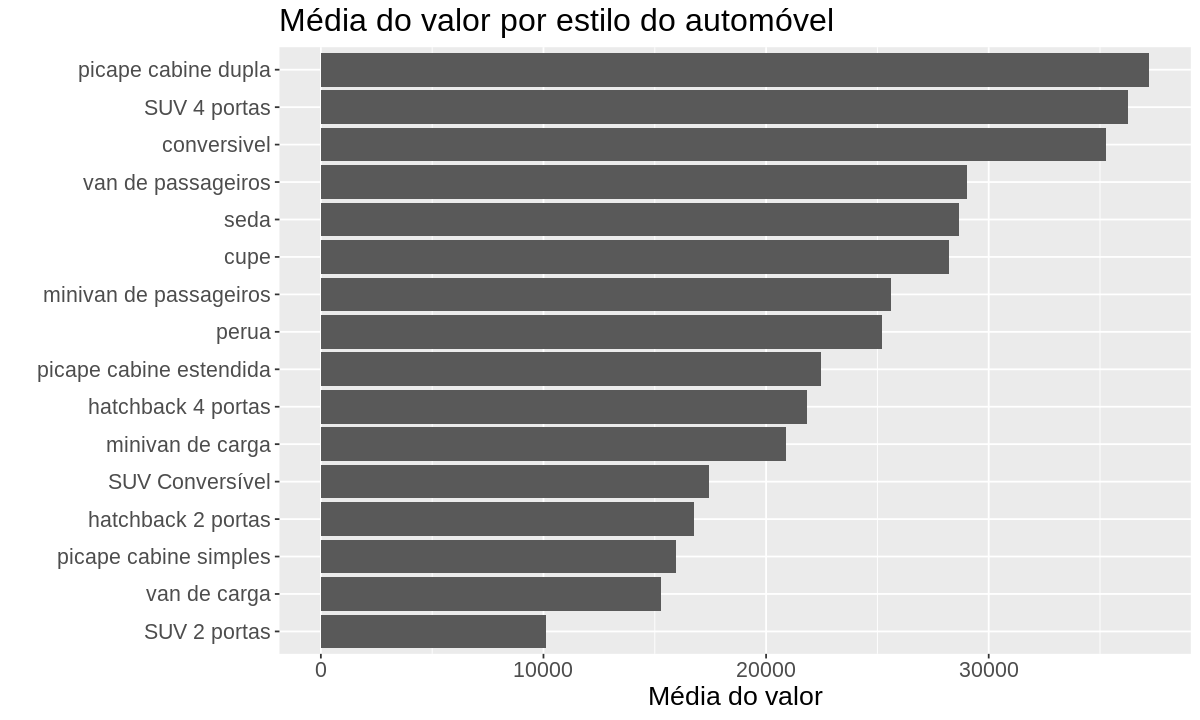

In [ ]:
dados %>%
  group_by(Estilo) %>%
  summarise(media_valor = mean(Valor)) %>%
  ggplot(aes(x = reorder(Estilo, media_valor), y = media_valor)) +
  geom_col() +
  coord_flip() +
    labs(title = 'Média do valor por estilo do automóvel',
         x = '',
         y = 'Média do valor') +
           theme(text = element_text(size = 16))

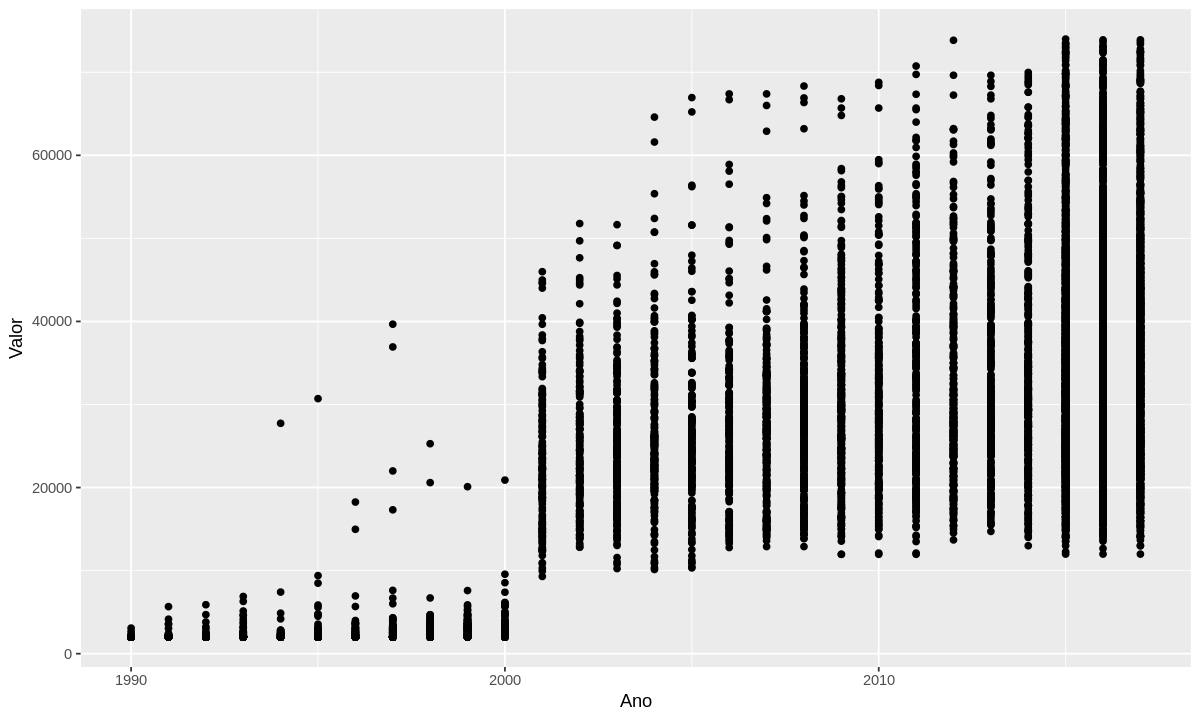

In [ ]:
ggplot(dados, aes(x = Ano, y = Valor)) +
  geom_point()

`geom_smooth()` using formula = 'y ~ x'


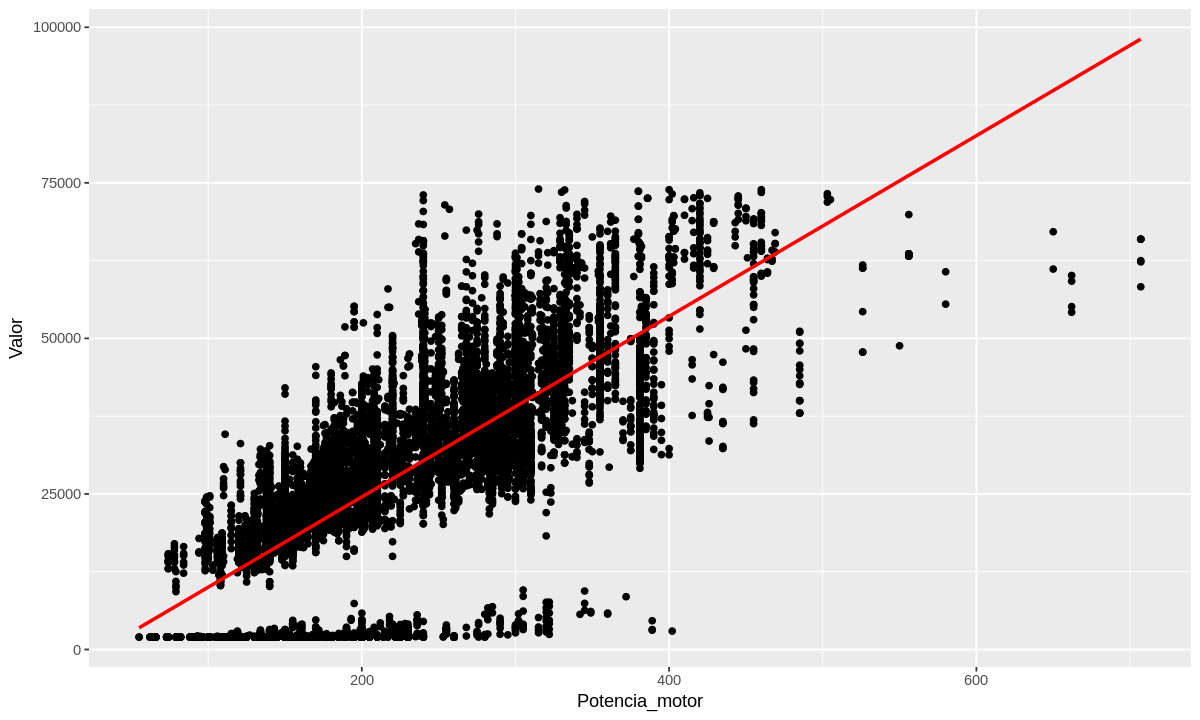

In [ ]:
ggplot(dados, aes(x = Potencia_motor, y = Valor)) +
  geom_point() +
    geom_smooth(method = 'lm', se = FALSE, color = 'red')

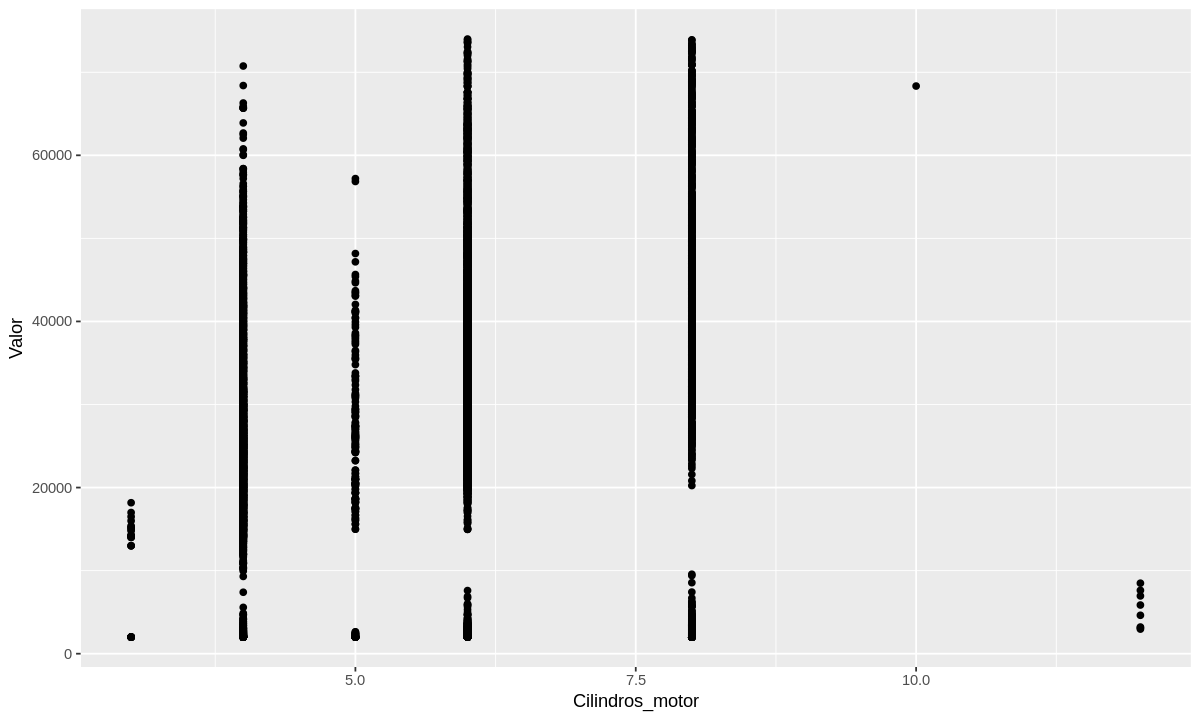

In [ ]:
ggplot(dados, aes(x = Cilindros_motor, y = Valor)) +
  geom_point()

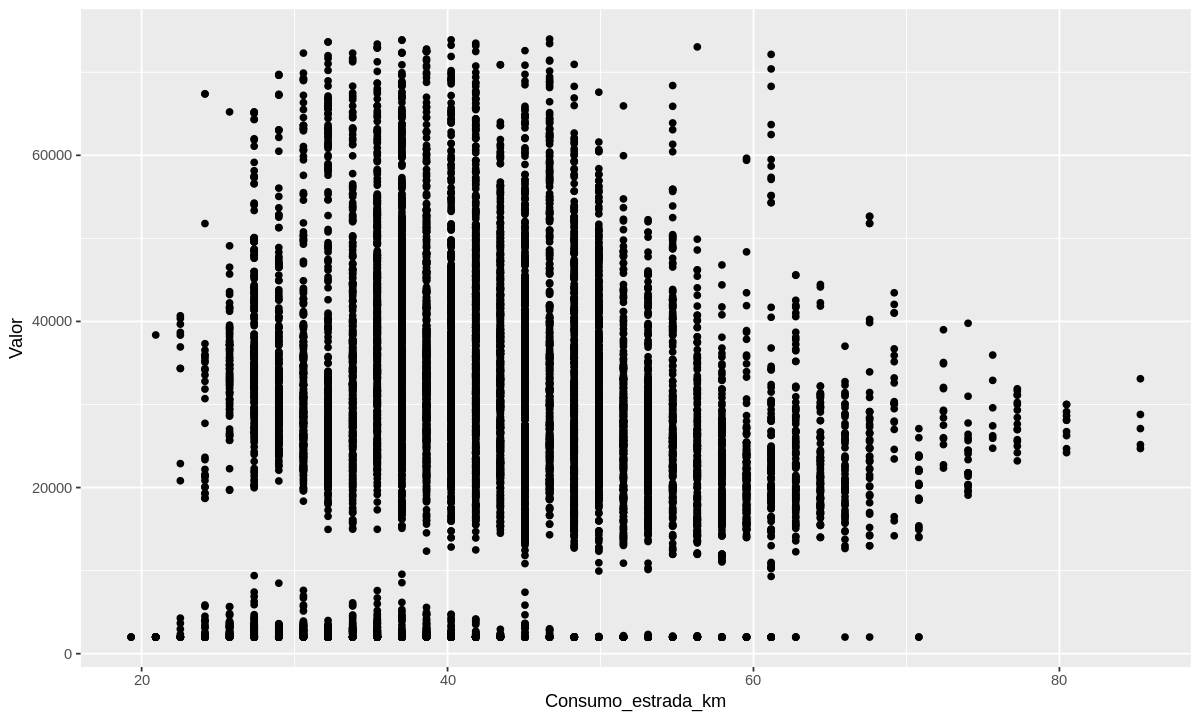

In [ ]:
ggplot(dados, aes(x = Consumo_estrada_km, y = Valor)) +
  geom_point()

In [ ]:
dados_numericos <- dados %>% select_if(is.numeric)

matriz_correlacao <- cor(dados_numericos)

matriz_correlacao

,Ano,Potencia_motor,Cilindros_motor,Consumo_estrada_km,Valor
Ano,1.0000000,0.3890908,-0.1065934,0.35776466,0.69665546
Potencia_motor,0.3890908,1.0000000,0.6952144,-0.43319516,0.73612504
Cilindros_motor,-0.1065934,0.6952144,1.0000000,-0.70162167,0.30405466
Consumo_estrada_km,0.3577647,-0.4331952,-0.7016217,1.00000000,-0.04757501
Valor,0.6966555,0.7361250,0.3040547,-0.04757501,1.00000000


##**Construindo o modelo de regressão linear múltipla**

In [ ]:
modelo_linear_simples <- lm(Valor ~ Potencia_motor, data = dados)

summary(modelo_linear_simples)


Call:
lm(formula = Valor ~ Potencia_motor, data = dados)

Residuals:
   Min     1Q Median     3Q    Max 
-50886  -5112   1506   6183  42714 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4494.228    310.542  -14.47   <2e-16 ***
Potencia_motor   145.125      1.283  113.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10800 on 10817 degrees of freedom
Multiple R-squared:  0.5419,	Adjusted R-squared:  0.5418 
F-statistic: 1.279e+04 on 1 and 10817 DF,  p-value: < 2.2e-16


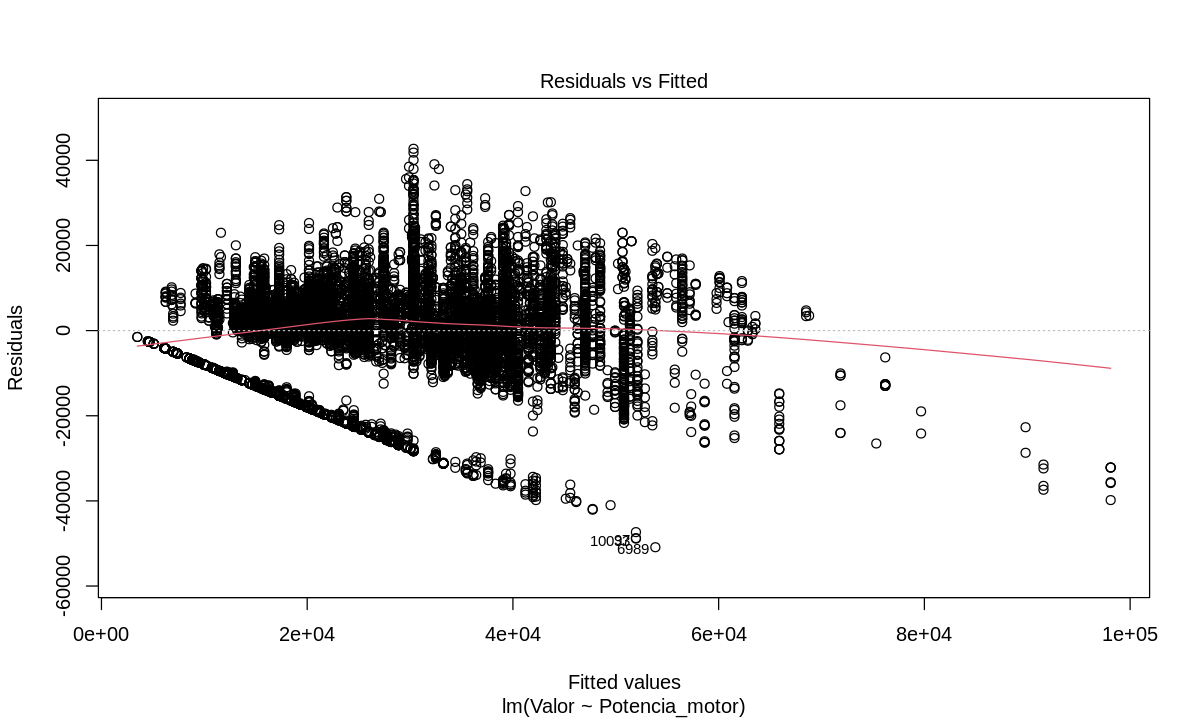

In [ ]:
plot(modelo_linear_simples, which=1)

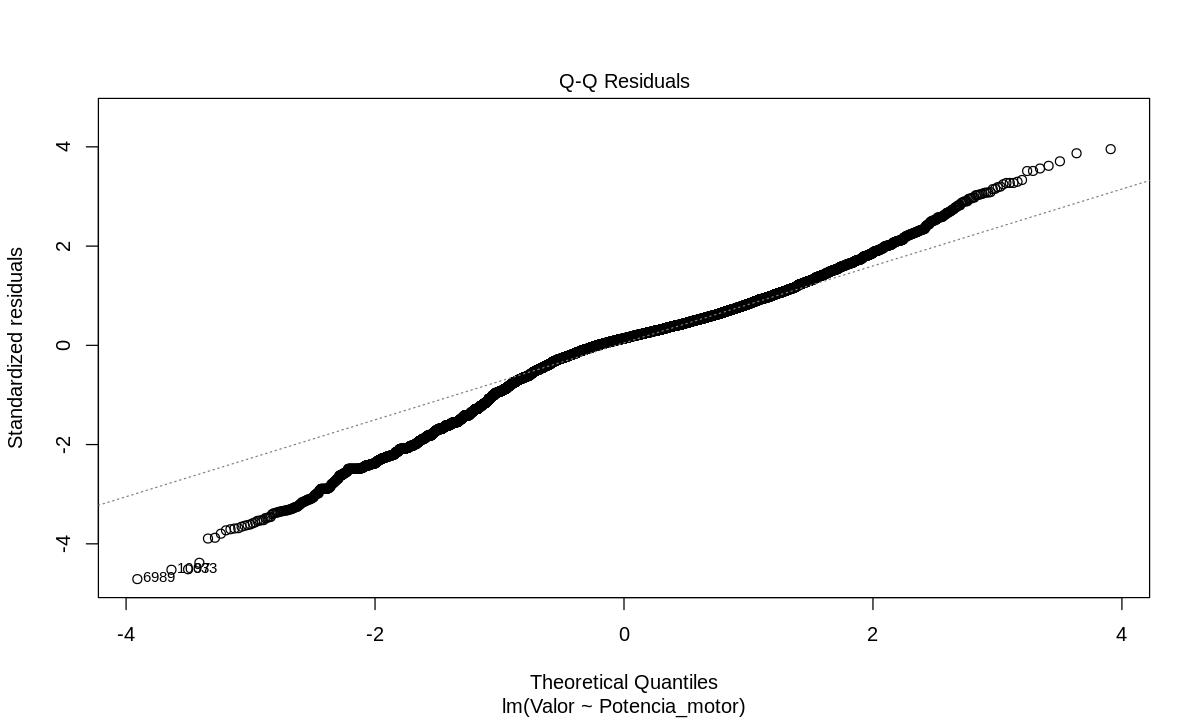

In [ ]:
plot(modelo_linear_simples, which=2)

In [ ]:
modelo_linear_multiplo <- lm(Valor ~ ., data= dados)

summary(modelo_linear_multiplo)


Call:
lm(formula = Valor ~ ., data = dados)

Residuals:
   Min     1Q Median     3Q    Max 
-30733  -4994   -517   4499  39640 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.882e+06  3.350e+04 -56.184  < 2e-16 ***
Estilocupe                    -7.247e+03  4.228e+02 -17.141  < 2e-16 ***
Estilohatchback 2 portas      -6.511e+03  4.796e+02 -13.578  < 2e-16 ***
Estilohatchback 4 portas      -7.363e+03  4.538e+02 -16.226  < 2e-16 ***
Estilominivan de carga        -6.454e+03  9.881e+02  -6.531 6.81e-11 ***
Estilominivan de passageiros  -4.768e+03  5.126e+02  -9.301  < 2e-16 ***
Estiloperua                   -4.246e+03  4.568e+02  -9.296  < 2e-16 ***
Estilopicape cabine dupla     -8.134e+03  4.715e+02 -17.252  < 2e-16 ***
Estilopicape cabine estendida -1.134e+04  4.826e+02 -23.495  < 2e-16 ***
Estilopicape cabine simples   -1.100e+04  5.298e+02 -20.765  < 2e-16 ***
Estiloseda                    -4.824e+03  3.596e+02 -